## Matlab - Python Pipeline Integration Dev

Previously in matlab, I've converted a nfiti file into matlab file, with the images reshaped in the same way of how the neural network is designed. 

In this notebook, we'll run the NN on the mat lab file and make predictions. 

In [14]:
# Import necessary modules 
import scipy.io
import numpy as np
import os 
import matplotlib.pyplot as plt

In [19]:
# Load the matlab file
data = scipy.io.loadmat('/home/smooi/vibes_auto_pipe/final_slices.mat')
print(type(data)) # Data is a dictionary. 
x = data.keys()
final_slices = data["final_slices"]

<class 'dict'>


(160, 160, 48)
(48, 160, 160)
(48, 160, 160, 1)
(48, 160, 160, 1)


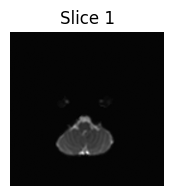

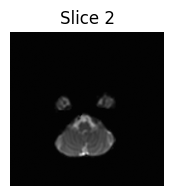

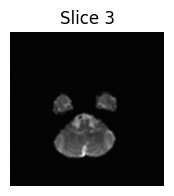

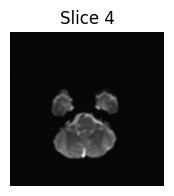

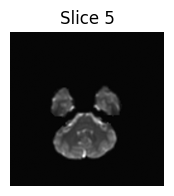

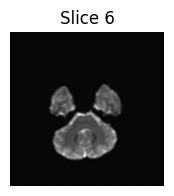

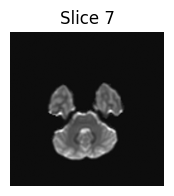

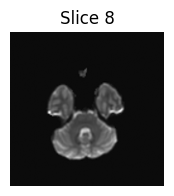

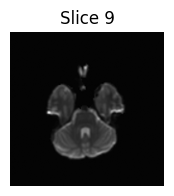

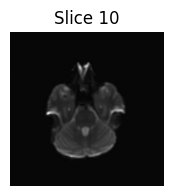

In [20]:
print(final_slices.shape) # (160, 160, 48)
# Clearly, this is not the desired shape that we want to fit into our neural network 
# We need to reshape this as (48, 160, 160, 1) with adding one more dimension 
# to indicate that the img is gray-scale
final_slices = np.transpose(final_slices, (2, 0, 1)) # check usage for transpose func for np
print(final_slices.shape)
# add the extra gray-scale dimension
final_slices = np.expand_dims(final_slices, axis=-1)
print(final_slices.shape)
final_slices = np.array([np.rot90(slice, k=1) for slice in final_slices])
print(final_slices.shape) 

for i in range(10):
    plt.figure(figsize=(2,2))
    plt.imshow(final_slices[i, :, :, 0], cmap='gray')  # Show the first grayscale channel
    plt.title(f"Slice {i + 1}")
    plt.axis('off')  # Remove axis
    plt.show()
    

In [ ]:
# try with the one without bet
